In [1]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio
from pca import pca
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns #for graphing

In [3]:
#import dataset
df= pd.read_csv('1.csv',encoding = "ISO-8859-1")

In [4]:
len(df)

138516

In [5]:
print(f"Missing values in each variable: \n{df.isnull().sum()}")

Missing values in each variable: 
consumer_id                0
search_id                  0
trip_roomN                 0
trip_peopleN               0
search_minstar             0
click_datetime        135681
hotel_id                   0
webpage_position           0
hotel_star              4508
hotel_price            17192
hotel_discounted        3705
CITY                       0
trip_begin             53907
trip_end               64221
search_datetime            0
click_for_purchase         0
click_for_details          0
sort_by_distance           0
sort_by_star               0
sort_by_price              0
dtype: int64


In [6]:
dfpurchase=df[df.click_for_details==1]

In [7]:
dfpurchase.head()

,consumer_id,search_id,trip_roomN,trip_peopleN,search_minstar,click_datetime,hotel_id,webpage_position,hotel_star,hotel_price,hotel_discounted,CITY,trip_begin,trip_end,search_datetime,click_for_purchase,click_for_details,sort_by_distance,sort_by_star,sort_by_price
51,0089575AFEDE4116A19D4AEB96FF9B73,308152773,1,2,0.0,10/1/2009 20:24,21483,3,0.0,35.0,N,1,NaN,NaN,10/1/2009,0,1,0,0,0
52,0089575AFEDE4116A19D4AEB96FF9B73,308152773,1,2,0.0,10/1/2009 20:27,524967,2,0.0,44.0,N,1,NaN,NaN,10/1/2009,0,1,0,0,0
54,0089575AFEDE4116A19D4AEB96FF9B73,308152773,1,2,0.0,10/1/2009 20:26,23835,4,0.0,35.0,N,1,NaN,NaN,10/1/2009,0,1,0,0,0
376,33160F898A964964A68997B964A2D773,308341174,1,2,5.0,10/1/2009 15:23,1401996,4,5.0,131.0,Y,1,NaN,NaN,10/1/2009,0,1,0,0,0
382,33160F898A964964A68997B964A2D773,308341174,1,2,5.0,10/1/2009 15:25,1097758,2,5.0,145.0,Y,1,NaN,NaN,10/1/2009,0,1,0,0,0


In [8]:
len(dfpurchase)

2340

In [9]:
print(f"Missing values in each variable: \n{dfpurchase.isnull().sum()}")

Missing values in each variable: 
consumer_id              0
search_id                0
trip_roomN               0
trip_peopleN             0
search_minstar           0
click_datetime           0
hotel_id                 0
webpage_position         0
hotel_star              60
hotel_price            243
hotel_discounted        70
CITY                     0
trip_begin             872
trip_end              1104
search_datetime          0
click_for_purchase       0
click_for_details        0
sort_by_distance         0
sort_by_star             0
sort_by_price            0
dtype: int64


In [10]:
dfpurchase=dfpurchase.fillna(method='ffill')
print(dfpurchase.isnull().sum())

consumer_id             0
search_id               0
trip_roomN              0
trip_peopleN            0
search_minstar          0
click_datetime          0
hotel_id                0
webpage_position        0
hotel_star              0
hotel_price             0
hotel_discounted        0
CITY                    0
trip_begin            567
trip_end              567
search_datetime         0
click_for_purchase      0
click_for_details       0
sort_by_distance        0
sort_by_star            0
sort_by_price           0
dtype: int64


In [11]:

def graph_histo(x): 
    if x.dtype == "int64" or x.dtype == "float64":
        # Select size of bins by getting maximum and minimum and divide the substraction by 10
        size_bins = 10
        # Get the title by getting the name of the column
        title = x.name
        #Assign random colors to each graph
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))

        # Plot the displot
        sns.distplot(x, bins=size_bins, kde_kws={"lw": 1.5, "alpha":0.8, "color":color_kde},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":color_bar})
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.ylabel("Frequency", size=16, labelpad=15);
        # Customize title
        plt.title(title, size=18)
        # Customize grid and axes visibility
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);   
    else:
        x = pd.DataFrame(x)
        # Plot       
        sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
        # Customize title
        title = x.columns[0]
        plt.title(title, size=18)
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.xlabel("")
        plt.ylabel("Counts", size=16, labelpad=15);        
        # Customize grid and axes visibility
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);

C:\Users\xuhon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



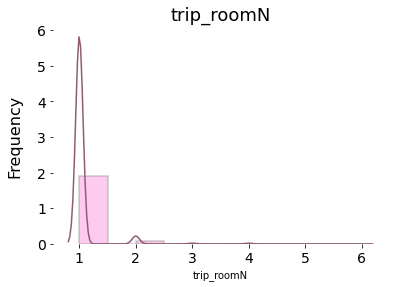

In [12]:
graph_histo(dfpurchase['trip_roomN'])


C:\Users\xuhon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



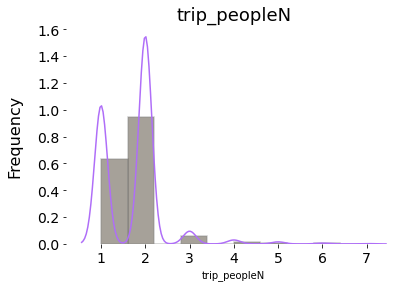

In [13]:
graph_histo(dfpurchase['trip_peopleN'])


C:\Users\xuhon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



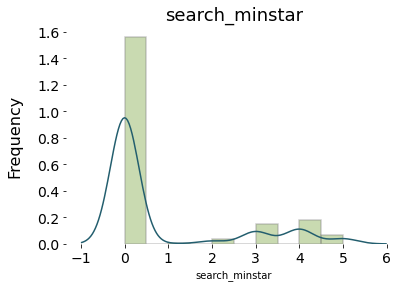

In [14]:
graph_histo(dfpurchase['search_minstar'])
#

C:\Users\xuhon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



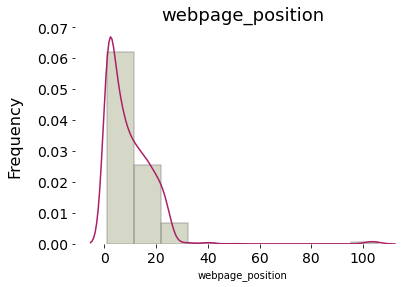

In [15]:
graph_histo(dfpurchase['webpage_position'])
#

C:\Users\xuhon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



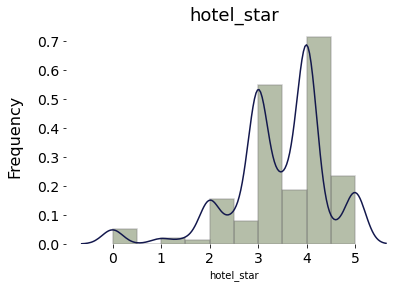

In [16]:
graph_histo(dfpurchase['hotel_star'])
#

C:\Users\xuhon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



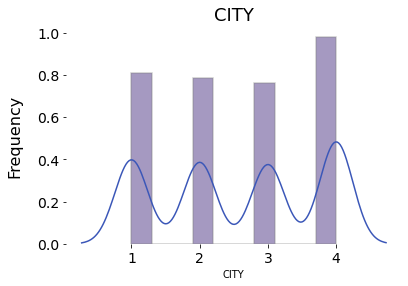

In [17]:
graph_histo(dfpurchase['CITY'])
#graph_histo(dfpurchase['click_for_purchase'])
#graph_histo(dfpurchase['click_for_details'])
#

C:\Users\xuhon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



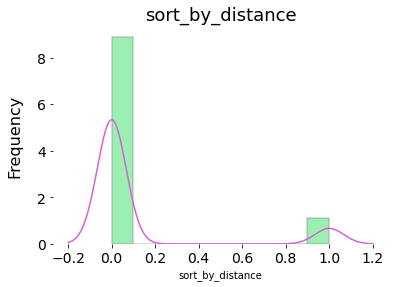

In [18]:
graph_histo(dfpurchase['sort_by_distance'])
#

C:\Users\xuhon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



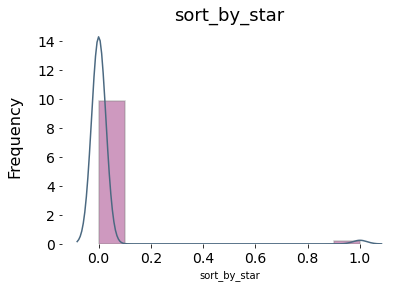

In [19]:
graph_histo(dfpurchase['sort_by_star'])
#

C:\Users\xuhon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



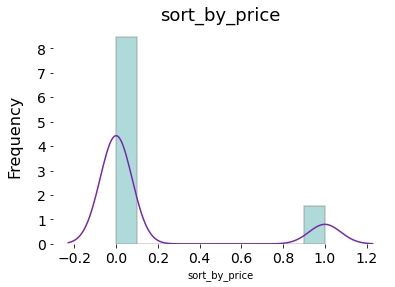

In [20]:
graph_histo(dfpurchase['sort_by_price'])

In [21]:
t1=dfpurchase.describe()
t1.T

,count,mean,std,min,25%,50%,75%,max
search_id,2340.0,3.155342e+08,4.188665e+06,308150867.0,312151508.0,315385850.0,318698568.5,324425005.0
trip_roomN,2340.0,1.057265e+00,3.083050e-01,1.0,1.0,1.0,1.0,6.0
trip_peopleN,2340.0,1.707265e+00,6.896525e-01,1.0,1.0,2.0,2.0,7.0
search_minstar,2340.0,7.888889e-01,1.545340e+00,0.0,0.0,0.0,0.0,5.0
hotel_id,2340.0,7.059269e+05,8.461338e+05,87.0,19906.0,428589.0,1117815.0,3066068.0
webpage_position,2340.0,9.623932e+00,1.002649e+01,1.0,2.0,7.0,15.0,106.0
hotel_star,2340.0,3.421581e+00,9.995425e-01,0.0,3.0,3.5,4.0,5.0
hotel_price,2340.0,1.702359e+02,1.253185e+02,7.0,80.0,138.0,235.0,1395.0
CITY,2340.0,2.574359e+00,1.147904e+00,1.0,2.0,3.0,4.0,4.0
click_for_purchase,2340.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


C:\Users\xuhon\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



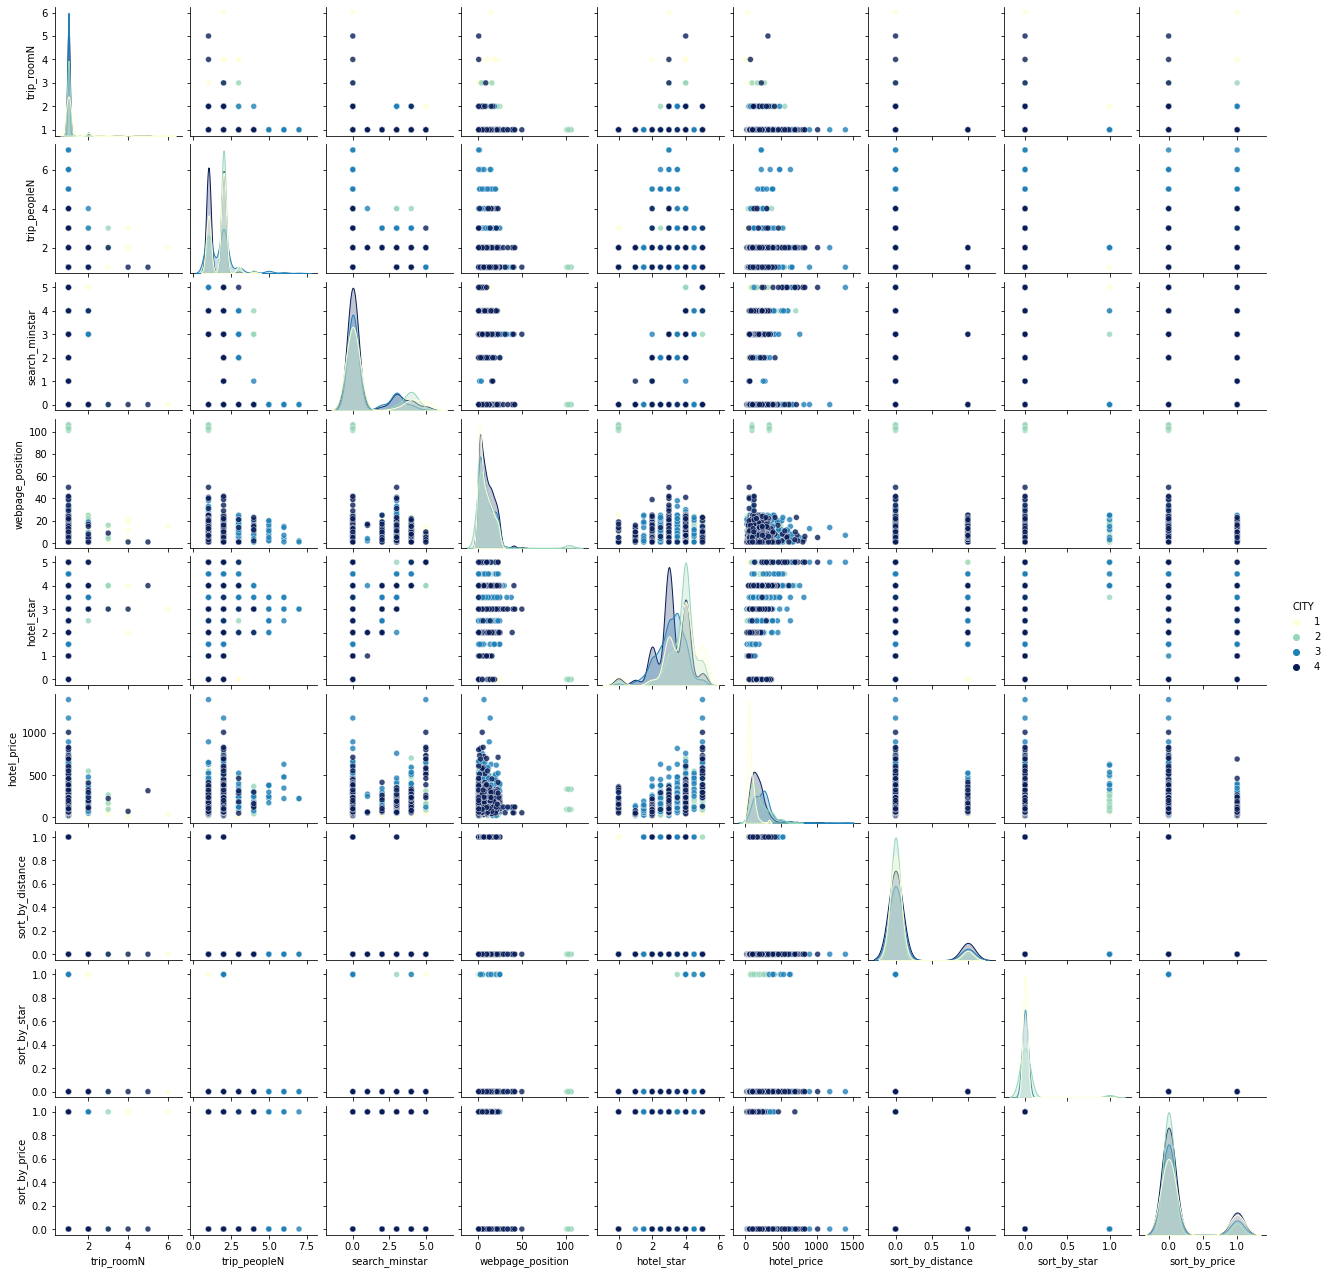

In [22]:
#correlation between parameter
sns.pairplot(dfpurchase, x_vars = ['trip_roomN','trip_peopleN','search_minstar','webpage_position','hotel_star','hotel_price','sort_by_distance','sort_by_star','sort_by_price'], 
               y_vars = ['trip_roomN','trip_peopleN','search_minstar','webpage_position','hotel_star','hotel_price','sort_by_distance','sort_by_star','sort_by_price'], 
             hue='CITY',  
             kind= "scatter",
               palette = "YlGnBu",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8});

In [43]:
X=dfpurchase[['trip_roomN','trip_peopleN','search_minstar','webpage_position','hotel_star','hotel_price','sort_by_distance','sort_by_star','sort_by_price']]

In [44]:
X

,trip_roomN,trip_peopleN,search_minstar,webpage_position,hotel_star,hotel_price,sort_by_distance,sort_by_star,sort_by_price
51,1,2,0.0,3,0.0,35.0,0,0,0
52,1,2,0.0,2,0.0,44.0,0,0,0
54,1,2,0.0,4,0.0,35.0,0,0,0
376,1,2,5.0,4,5.0,131.0,0,0,0
382,1,2,5.0,2,5.0,145.0,0,0,0
...,...,...,...,...,...,...,...,...,...
138214,1,2,0.0,1,2.0,64.0,0,0,1
138218,1,2,0.0,7,4.0,116.0,0,0,1
138234,1,2,0.0,10,3.0,119.0,0,0,1
138235,1,2,0.0,5,3.0,97.0,0,0,1


In [45]:
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [46]:
pca = PCA(n_components=2).fit(X)

In [47]:
print(pca.components_)

[[ 0.0074812   0.10833514  0.27784208 -0.02373535 -0.08283376 -0.04271991
  -0.43708816 -0.01557924  0.84289545]
 [ 0.00126055  0.07869861  0.68960192 -0.01622686  0.32686096  0.07629838
  -0.45965839  0.02481272 -0.43980654]]


In [48]:
print(pca.explained_variance_)

[0.14463365 0.11194957]


In [49]:
# Transform samples using the PCA fit
pca_2d = pca.transform(X)

In [50]:
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley, color="#c7e9c0", edgecolor="#006d2c", alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='#253494',alpha=0.5,lw=2) 
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color="#000000", ha="center", va="center")
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color="#000000", ha="center", va="center")
    plt.xlim(-.75,1)
    plt.ylim(-0.5,1)
    plt.grid(False)
    plt.xticks(np.arange(0, 1, 0.5), size=12)
    plt.yticks(np.arange(-0.75, 1, 0.5), size=12)
    plt.xlabel("Component 1", size=14)
    plt.ylabel("Component 2", size=14)
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);  
 



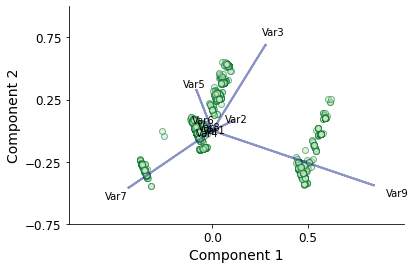

In [51]:
#Call the function. Use only the 2 PCs.
biplot(pca_2d[:,0:2], np.transpose(pca.components_[0:2, :]))

From the graph above we can see that var7(sort by distance), var9 (sort by price) and Var3 (SearchMinStar) are important at the two dimensions

C:\Users\xuhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.



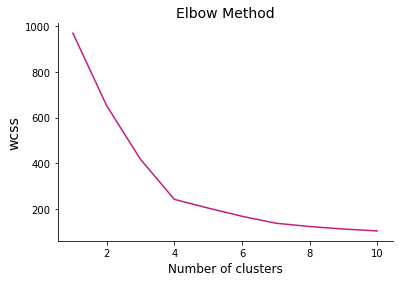

In [52]:

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

In [61]:
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 5
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=10, n_init=10, random_state=0)

# Fit and predict 
y_means = kmeans.fit_predict(X)

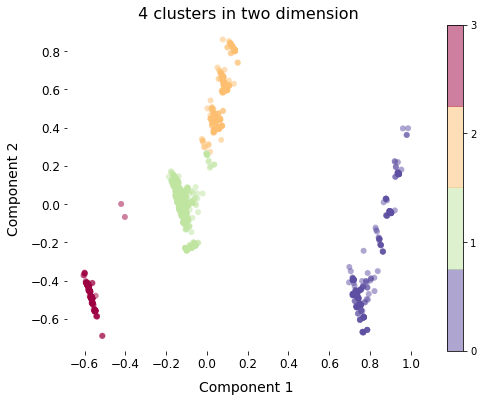

In [64]:
fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=y_means, 
            edgecolor="none", 
            cmap=plt.cm.get_cmap("Spectral_r",4),
            alpha=0.5)
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)

plt.title(' 4 clusters in two dimension', size=16)


plt.colorbar(ticks=[0, 1, 2, 3]);

plt.show()

In [65]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns =['trip_roomN','trip_peopleN','search_minstar','webpage_position','hotel_star','hotel_price','sort_by_distance','sort_by_star','sort_by_price'])

In [66]:
centroids.index_name = "ClusterID"

In [67]:
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)

In [68]:
centroids

,trip_roomN,trip_peopleN,search_minstar,webpage_position,hotel_star,hotel_price,sort_by_distance,sort_by_star,sort_by_price,ClusterID
0,1.620112e-02,0.171322,0.213966,0.064113,0.565084,0.066518,2.775558e-17,-6.938894e-18,1.000000e+00,0
1,1.364985e-02,0.113749,0.004154,0.086279,0.683234,0.119584,-6.938894e-17,2.670623e-02,-1.942890e-16,1
2,6.933333e-03,0.161778,0.762133,0.077435,0.819200,0.157091,5.551115e-17,1.066667e-02,0.000000e+00,2
3,-5.204170e-18,0.001931,0.004633,0.092260,0.659459,0.120748,1.000000e+00,-3.469447e-18,0.000000e+00,3


The most important features appear to be search_minstar and sort by distance and sorbyprice. we have search minimum star in middle range, sort by distance close to 0 but sort by price as 1 as our cluster 0. Cluster 1 has search minstar low, sort by distance 0 and sort by price 0. Cluster 2 has high search minstar, sort by distance close to 0 and sort by price 0 as. Cluster 3 has search minlow search minstar, sort by distance is 1 and sort by price 0.

In [69]:
dfpurchase['cluster']=kmeans.fit_predict(X)

In [70]:
dfpurchase.T

,51,52,54,376,382,534,535,536,656,740,...,138086,138141,138147,138158,138213,138214,138218,138234,138235,138288
consumer_id,0089575AFEDE4116A19D4AEB96FF9B73,0089575AFEDE4116A19D4AEB96FF9B73,0089575AFEDE4116A19D4AEB96FF9B73,33160F898A964964A68997B964A2D773,33160F898A964964A68997B964A2D773,5DE74A34AD254F0E91F53B09D1ABD670,5DE74A34AD254F0E91F53B09D1ABD670,5DE74A34AD254F0E91F53B09D1ABD670,97E2CFBB91924D729FB4D93BE4D7CACF,A456A6A2769F43C8B1BEAE370979EA2A,...,91B0D436114F4A089E591D1110793E0E,9B73C06BFB6641EB85339B5E380CBE16,9B73C06BFB6641EB85339B5E380CBE16,9B73C06BFB6641EB85339B5E380CBE16,9B73C06BFB6641EB85339B5E380CBE16,9B73C06BFB6641EB85339B5E380CBE16,9B73C06BFB6641EB85339B5E380CBE16,9B73C06BFB6641EB85339B5E380CBE16,9B73C06BFB6641EB85339B5E380CBE16,9B73C06BFB6641EB85339B5E380CBE16
search_id,308152773,308152773,308152773,308341174,308341174,308504289,308504290,308504291,308724977,308771839,...,324146133,324184176,324184176,324184176,324184179,324184179,324184179,324184179,324184179,324184183
trip_roomN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
trip_peopleN,2,2,2,2,2,2,2,2,2,1,...,2,2,2,2,2,2,2,2,2,2
search_minstar,0,0,0,5,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
click_datetime,10/1/2009 20:24,10/1/2009 20:27,10/1/2009 20:26,10/1/2009 15:23,10/1/2009 15:25,10/1/2009 14:55,10/1/2009 14:57,10/1/2009 14:59,10/1/2009 21:03,10/1/2009 13:44,...,10/16/2009 5:24,10/16/2009 21:12,10/16/2009 21:11,10/16/2009 21:10,10/16/2009 22:11,10/16/2009 21:30,10/16/2009 21:42,10/16/2009 22:02,10/16/2009 21:31,10/16/2009 23:25
hotel_id,21483,524967,23835,1401996,1097758,2099584,1465061,699744,21146,806300,...,2719,1507997,2523304,3004601,899760,48288,433418,18784,22936,11355
webpage_position,3,2,4,4,2,1,1,1,4,15,...,1,3,2,1,6,1,7,10,5,1
hotel_star,0,0,0,5,5,4,4,4,5,5,...,3,2,2,2,2.5,2,4,3,3,3
hotel_price,35,44,35,131,145,52,58,57,107,84,...,201,103,97,92,95,64,116,119,97,102


In [42]:
dfpurchase.to_csv(r'C:\Users\xuhon\OneDrive\Desktop\UCI\Winter\MGMT Social Analytics\New folder\dfpurchase.csv')

In [41]:
#TRY to predict if there is a new customer come in tommorrow to search 

#columns =['trip_roomN','trip_peopleN','search_minstar','webpage_position','hotel_star',
#'hotel_price','sort_by_distance','sort_by_star','sort_by_price','CITY']
X_new = np.array([[2,4, 0,15,2,600, 0,0, 1,1]]) 
X_new=scaler.transform(X_new)
new_customer = kmeans.predict(X_new)
print(f"The new customer belongs to segment {new_customer[0]}")

The new customer belongs to segment 3
